In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "results/test_file.csv"
df = pd.read_csv(file_path, index_col=False)
df = df.loc[df.track_id==2]
df.head()

,track_id,input1_latitude,input1_longitude,input2_latitude,input2_longitude,input3_latitude,input3_longitude,input4_latitude,input4_longitude,target_latitude,target_longitude,prediction_latitude,prediction_longitude
7,2,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,"[0.020824074745178223, 0.0177445188164711, -0....","[1.8990029096603394, 1.9924280643463135, 1.986..."
8,2,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,"[-0.17447298765182495, -0.3009862005710602, -0...","[2.4807562828063965, 2.5241310596466064, 2.388..."
9,2,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,"[-0.5825176239013672, -0.5430954694747925, -0....","[2.6264610290527344, 2.6024601459503174, 2.216..."
10,2,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,"[-1.2085498571395874, -1.0735023021697998, -1....","[2.0126476287841797, 2.430894374847412, 1.7487..."
11,2,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,-1.5,1.5,"[-1.6545888185501099, -1.7907216548919678, -1....","[1.3287409543991089, 1.3422915935516357, 1.539..."


In [29]:
index = np.random.randint(0, 19)

# Data
data_lat = np.array(df.prediction_latitude.apply(lambda x: np.array(eval(x))).tolist())[index]
data_long = np.array(df.prediction_longitude.apply(lambda x: np.array(eval(x))).tolist())[index]
data = np.vstack((data_lat, data_long))
data.min(axis=1), data.max(axis=1)

(array([-3.01571727,  1.06056762]), array([-2.40835524,  2.29111099]))

In [30]:
_mean, _cov = np.mean(data, axis=1), np.cov(data)
_mean, _cov

(array([-2.72159082,  1.42391986]),
 array([[0.01538378, 0.00172852],
        [0.00172852, 0.03841242]]))

In [31]:
from scipy.stats import multivariate_normal

In [32]:
dist = multivariate_normal(mean=_mean, cov=_cov)

In [33]:
x = np.linspace(_mean[0]-1, _mean[0]+1, 100)
y = np.linspace(_mean[1]-1, _mean[1]+1, 100)

xx, yy = np.meshgrid(x, y)


In [34]:
pdf = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        pdf[i, j] = dist.pdf([xx[i, j], yy[i, j]])

print(pdf[0])
        

[1.67927581e-18 5.84457136e-18 1.98062931e-17 6.53542205e-17
 2.09973254e-16 6.56862125e-16 2.00080316e-15 5.93409387e-15
 1.71365882e-14 4.81852605e-14 1.31924047e-13 3.51684817e-13
 9.12857897e-13 2.30713303e-12 5.67756347e-12 1.36041453e-11
 3.17395254e-11 7.21023627e-11 1.59484495e-10 3.43484654e-10
 7.20304476e-10 1.47077009e-09 2.92410773e-09 5.66059196e-09
 1.06696515e-08 1.95820664e-08 3.49934456e-08 6.08884329e-08
 1.03157970e-07 1.70173011e-07 2.73337035e-07 4.27490214e-07
 6.50989192e-07 9.65253268e-07 1.39356967e-06 1.95900702e-06
 2.68140986e-06 3.57363599e-06 4.63742957e-06 5.85954971e-06
 7.20893419e-06 8.63570466e-06 1.00726653e-05 1.14396023e-05
 1.26501989e-05 1.36208335e-05 1.42800561e-05 1.45772649e-05
 1.44891224e-05 1.40225830e-05 1.32139865e-05 1.21243817e-05
 1.08319150e-05 9.42260077e-06 7.98098030e-06 6.58205625e-06
 5.28550931e-06 4.13268208e-06 3.14627771e-06 2.33228711e-06
 1.68339826e-06 1.18307326e-06 8.09573535e-07 5.39412331e-07
 3.49949470e-07 2.210597

In [42]:
input_lat = np.array([df.input1_latitude, df.input2_latitude, df.input3_latitude, df.input4_latitude])
input_lat = np.transpose(input_lat)
print(input_lat)

input_long = np.array([df.input1_longitude, df.input2_longitude, df.input3_longitude, df.input4_longitude])
input_long = np.transpose(input_long)
print(input_lat[0])

[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.1       ]
 [ 0.          0.         -0.1        -0.30000001]
 [ 0.         -0.1        -0.30000001 -0.69999999]
 [-0.1        -0.30000001 -0.69999999 -1.10000002]
 [-0.30000001 -0.69999999 -1.10000002 -1.5       ]
 [-0.69999999 -1.10000002 -1.5        -1.89999998]
 [-1.10000002 -1.5        -1.89999998 -2.29999995]
 [-1.5        -1.89999998 -2.29999995 -2.5999999 ]
 [-1.89999998 -2.29999995 -2.5999999  -2.79999995]
 [-2.29999995 -2.5999999  -2.79999995 -2.9000001 ]
 [-2.5999999  -2.79999995 -2.9000001  -2.9000001 ]
 [-2.79999995 -2.9000001  -2.9000001  -2.70000005]
 [-2.9000001  -2.9000001  -2.70000005 -2.5       ]
 [-2.9000001  -2.70000005 -2.5        -2.20000005]
 [-2.70000005 -2.5        -2.20000005 -1.89999998]
 [-2.5        -2.20000005 -1.89999998 -1.60000002]
 [-2.20000005 -1.89999998 -1.60000002 -1.29999995]
 [-1.89999998 -1.60000002 -1.29999995 -1.        ]]
[0. 0. 0. 0.]


[-1.10000002 -1.5        -1.89999998 -2.29999995]
[1.79999995 1.5        1.29999995 1.39999998]
7


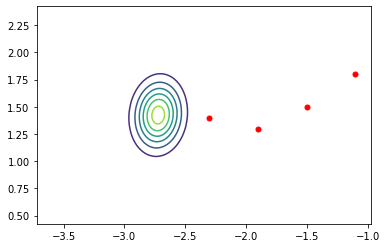

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf)
ax.plot([input_lat[index]], [input_long[index]], marker = 'o', markersize=5, color="red")
print(input_lat[index])
print(input_long[index])
print(index)